# Group Challenge

Contributors:

* Alba Vilanova Cortezón (https://github.com/albavilanova)
* Jannis Fröhlking (https://github.com/JaFro96)
* Jonathan Bahlmann (https://github.com/jonathom)

In [1]:
# Imports 

import requests
import zipfile
import os
import pandas as pd
import ftplib
import os
from getpass import getpass
import xarray as xr
import numpy as np

## STEP 1: Collect Data

Dates

* 01.01.2020
* 01.04.2020
* 01.07.2020
* 01.10.2020

### AIS


In [2]:

# Download data

# Set file path
"""
urls = ['https://coast.noaa.gov/htdata/CMSP/AISDataHandler/2020/AIS_2020_01_01.zip',
'https://coast.noaa.gov/htdata/CMSP/AISDataHandler/2020/AIS_2020_04_01.zip',
'https://coast.noaa.gov/htdata/CMSP/AISDataHandler/2020/AIS_2020_07_01.zip',
'https://coast.noaa.gov/htdata/CMSP/AISDataHandler/2020/AIS_2020_10_01.zip']
"""

urls = ['https://coast.noaa.gov/htdata/CMSP/AISDataHandler/2020/AIS_2020_01_01.zip',
'https://coast.noaa.gov/htdata/CMSP/AISDataHandler/2020/AIS_2020_04_01.zip',
'https://coast.noaa.gov/htdata/CMSP/AISDataHandler/2020/AIS_2020_07_01.zip']
"""

# Unzip data
for url in urls:

  r = requests.get(url)
  filename = url.split('/')[-1]
  with open(filename,'wb') as output_file:
      output_file.write(r.content)
  print(filename)

  try:
      with zipfile.ZipFile(filename) as z:
          z.extractall()
          print("Extracted file")
          os.remove(filename)
  except:
      print("Invalid file")

print("Download completed!")
"""

'\n\n# Unzip data\nfor url in urls:\n\n  r = requests.get(url)\n  filename = url.split(\'/\')[-1]\n  with open(filename,\'wb\') as output_file:\n      output_file.write(r.content)\n  print(filename)\n\n  try:\n      with zipfile.ZipFile(filename) as z:\n          z.extractall()\n          print("Extracted file")\n          os.remove(filename)\n  except:\n      print("Invalid file")\n\nprint("Download completed!")\n'

In [3]:
# Read csv and create df
"""
ais_data = pd.DataFrame()

for url in urls:

  filename = url.split('/')[-1]
  filename = filename.replace("zip", "csv")
  data = pd.read_csv('data/' + filename)
  ais_data = ais_data.append(data)
  
print("Before preprocessing...")
ais_data = ais_data.reset_index(drop=True)
ais_data
"""

'\nais_data = pd.DataFrame()\n\nfor url in urls:\n\n  filename = url.split(\'/\')[-1]\n  filename = filename.replace("zip", "csv")\n  data = pd.read_csv(\'data/\' + filename)\n  ais_data = ais_data.append(data)\n  \nprint("Before preprocessing...")\nais_data = ais_data.reset_index(drop=True)\nais_data\n'

In [4]:
# Create backup of AIS data
"""
ais_data.to_csv('data/ais_data_all.csv')
backup_ais_data = pd.read_csv('data/ais_data_all.csv')
backup_ais_data
"""

"\nais_data.to_csv('data/ais_data_all.csv')\nbackup_ais_data = pd.read_csv('data/ais_data_all.csv')\nbackup_ais_data\n"

### CMEMS
Downloading the data for the 4 days (in stage I). [DATASETS](https://resources.marine.copernicus.eu/?option=com_csw&task=results)

In [5]:
# Connect to CMEMS FTP

name = 'avilanovacortez'
pwd = 'CMEMS-data-2021'
"""
name = getpass('Enter name: ')
pwd = getpass('Enter pwd: ')
"""

def make_con(url):

    con = ftplib.FTP(url)
    print(con.getwelcome())

    return con

con = make_con('nrt.cmems-du.eu')

220 Welcome to CMEMS FTP service


In [6]:
# Print available data

wav_url = '/Core/GLOBAL_ANALYSIS_FORECAST_WAV_001_027/global-analysis-forecast-wav-001-027/2020/' # Wave products: 3-hourly, one-day-forecast
phy_url = '/Core/GLOBAL_ANALYSIS_FORECAST_PHY_001_024/global-analysis-forecast-phy-001-024/2020/' # Physical products

def print_collection(url, con):

  try:
    # Login
    con.login(name, pwd)
    # Navigate to a wave forecast product, this month
    con.cwd(url)
    # Retrieve as list
    con.retrlines('LIST') 
    
  except ftplib.all_errors as e:
    print('FTP error:', e)

# print_collection(wav_url + '07', con) # print content of url

new_url = '/Core/GLOBAL_REANALYSIS_PHY_001_030/global-reanalysis-phy-001-030-daily/2019' # It is only available till 2019
# print_collection(new_url, make_con('my.cmems-du.eu'))

In [7]:
# Download data 

wav_url = '/Core/GLOBAL_ANALYSIS_FORECAST_WAV_001_027/global-analysis-forecast-wav-001-027/2020/' # Wave products: 3-hourly, one-day-forecast
phy_url = '/Core/GLOBAL_ANALYSIS_FORECAST_PHY_001_024/global-analysis-forecast-phy-001-024/2020/' # Physical products

wav_jan = "mfwamglocep_2020010100_R20200102.nc"
wav_apr = "mfwamglocep_2020040100_R20200402.nc"
wav_jul = "mfwamglocep_2020070100_R20200702.nc"
wav_oct = "mfwamglocep_2020100100_R20201002.nc"

phy_jan = "mercatorpsy4v3r1_gl12_mean_20200101_R20200115.nc"
phy_apr = "mercatorpsy4v3r1_gl12_mean_20200401_R20200415.nc"
phy_jul = "mercatorpsy4v3r1_gl12_mean_20200701_R20200715.nc"
phy_oct = "mercatorpsy4v3r1_gl12_mean_20201001_R20201014.nc"

def download_ftp(url, prod_name):
  # Check if file exists, taken from source at the top
  if os.path.isfile(prod_name):
    print("There is already a local copy of {}".format(prod_name))
  else:
    try:
      # Login as before
      con.login(name, pwd)
      # Navigate to desired folder
      con.cwd(url)

      with open(prod_name, 'wb') as fp:
        con.retrbinary('RETR {}'.format(prod_name), fp.write)
            
    except ftplib.all_errors as e:
      print('FTP error:', e)

"""
# Use this to download data 
download_ftp(wav_url + '01', wav_jan)
download_ftp(wav_url + '04', wav_apr)
download_ftp(wav_url + '07', wav_jul)
download_ftp(wav_url + '10', wav_oct)

download_ftp(phy_url + '01', phy_jan)
download_ftp(phy_url + '04', phy_apr)
download_ftp(phy_url + '07', phy_jul)
download_ftp(phy_url + '10', phy_oct)
"""

"\n# Use this to download data \ndownload_ftp(wav_url + '01', wav_jan)\ndownload_ftp(wav_url + '04', wav_apr)\ndownload_ftp(wav_url + '07', wav_jul)\ndownload_ftp(wav_url + '10', wav_oct)\n\ndownload_ftp(phy_url + '01', phy_jan)\ndownload_ftp(phy_url + '04', phy_apr)\ndownload_ftp(phy_url + '07', phy_jul)\ndownload_ftp(phy_url + '10', phy_oct)\n"

In [8]:
"""
# OPTIONAL: Show wave direction

def get_closest(array, value):
    return np.abs(array - value).argmin()

ds_wav_jan = xr.open_dataset('data/' + wav_jan)

ds_wav_jan.VMDR.isel(time=0).plot(robust=True, aspect=2, size=7); # wave direction
ds_wav_jan
"""

"\n# OPTIONAL: Show wave direction\n\ndef get_closest(array, value):\n    return np.abs(array - value).argmin()\n\nds_wav_jan = xr.open_dataset('data/' + wav_jan)\n\nds_wav_jan.VMDR.isel(time=0).plot(robust=True, aspect=2, size=7); # wave direction\nds_wav_jan\n"

In [9]:
# OPTIONAL: Reduce CMEMS waves data size by using bbox

# Define regional domain
# Baltic sea
bbox = ((10, 54), (30, 65))

# Between Rio de Janeiro and Lisboa
# bbox = ((-9, 22), (-46, 38))

def get_closest(array, value):
    return np.abs(array - value).argmin()
    
ds_wav_jan = xr.open_dataset('data/' + wav_jan)
ds_wav_apr = xr.open_dataset('data/' + wav_apr)
ds_wav_jul = xr.open_dataset('data/' + wav_jul)
#ds_wav_oct = xr.open_dataset('data/' + wav_oct)

#ds_wav_all = [ds_wav_jan, ds_wav_apr, ds_wav_jul, ds_wav_oct]
ds_wav_all = [ds_wav_jan, ds_wav_apr, ds_wav_jul]

datasets_wav = []

for ds_month in ds_wav_all:
  
  lon_min = get_closest(ds_month.longitude.data, bbox[0][0])
  lon_max = get_closest(ds_month.longitude.data, bbox[1][0])
  lat_min = get_closest(ds_month.latitude.data, bbox[0][1])
  lat_max = get_closest(ds_month.latitude.data, bbox[1][1])

  ds_wav_month_reg = ds_month.isel(time = 0, longitude = slice(lon_min, lon_max), latitude = slice(lat_min, lat_max))
  datasets_wav.append(ds_wav_month_reg)

ds_wav = xr.concat(datasets_wav, dim = 'time')
ds_wav

<xarray.Dataset>
Dimensions:    (latitude: 132, longitude: 240, time: 3)
Coordinates:
  * longitude  (longitude) float64 10.0 10.08 10.17 10.25 ... 29.75 29.83 29.92
  * latitude   (latitude) float64 54.0 54.08 54.17 54.25 ... 64.75 64.83 64.92
  * time       (time) datetime64[ns] 2020-01-01T03:00:00 ... 2020-07-01T03:00:00
Data variables: (12/17)
    VHM0       (time, latitude, longitude) float32 nan nan nan ... nan nan nan
    VMDR_WW    (time, latitude, longitude) float32 nan nan nan ... nan nan nan
    VHM0_WW    (time, latitude, longitude) float32 nan nan nan ... nan nan nan
    VMDR_SW1   (time, latitude, longitude) float32 nan nan nan ... nan nan nan
    VTM01_SW1  (time, latitude, longitude) float32 nan nan nan ... nan nan nan
    VMDR_SW2   (time, latitude, longitude) float32 nan nan nan ... nan nan nan
    ...         ...
    VTPK       (time, latitude, longitude) float32 nan nan nan ... nan nan nan
    VSDX       (time, latitude, longitude) float32 nan nan nan ... nan nan nan
    VSDY       (time, latitude, longitude) float32 nan nan nan ... nan nan nan
    VPED       (time, latitude, longitude) float32 nan nan nan ... nan nan nan
    VTM02      (time, latitude, longitude) float32 nan nan nan ... nan nan nan
    VTM01_WW   (time, latitude, longitude) float32 nan nan nan ... nan nan nan
Attributes: (12/27)
    Conventions:                   CF-1.6
    time_coverage_start:           20200101-03:00:00
    time_coverage_end:             20200102-00:00:00
    date_created:                  20200102-06:22:00
    product_type:                  hindcast
    product:                       GLOBAL_ANALYSIS_FORECAST_WAV_001_027
    ...                            ...
    geospatial_lon_step:           0.08332825
    geospatial_lon_units:          degree
    geospatial_lat_min:            -80.0
    geospatial_lat_max:            90.0
    geospatial_lat_step:           0.08333588
    geospatial_lat_units:          degree

In [10]:
# OPTIONAL: Reduce CMEMS physics data size by using bbox

ds_phy_jan = xr.open_dataset('data/' + phy_jan)
ds_phy_apr = xr.open_dataset('data/' + phy_apr)
ds_phy_jul = xr.open_dataset('data/' + phy_jul)
#ds_phy_oct = xr.open_dataset('data/' + phy_oct)

#ds_phy_all = [ds_phy_jan, ds_phy_apr, ds_phy_jul, ds_phy_oct]
ds_phy_all = [ds_phy_jan, ds_phy_apr, ds_phy_jul]

datasets_phy = []

for ds_month in ds_phy_all:
  
  lon_min = get_closest(ds_month.longitude.data, bbox[0][0])
  lon_max = get_closest(ds_month.longitude.data, bbox[1][0])
  lat_min = get_closest(ds_month.latitude.data, bbox[0][1])
  lat_max = get_closest(ds_month.latitude.data, bbox[1][1])

  ds_phy_month_reg = ds_month.isel(time = 0, longitude = slice(lon_min, lon_max), latitude = slice(lat_min, lat_max))
  datasets_phy.append(ds_phy_month_reg)

ds_phy = xr.concat(datasets_phy, dim = 'time')
ds_phy

<xarray.Dataset>
Dimensions:    (depth: 50, latitude: 132, longitude: 240, time: 3)
Coordinates:
  * longitude  (longitude) float32 10.0 10.08 10.17 10.25 ... 29.75 29.83 29.92
  * latitude   (latitude) float32 54.0 54.08 54.17 54.25 ... 64.75 64.83 64.92
  * depth      (depth) float32 0.494 1.541 2.646 ... 5.275e+03 5.728e+03
  * time       (time) datetime64[ns] 2020-01-01T12:00:00 ... 2020-07-01T12:00:00
Data variables:
    mlotst     (time, latitude, longitude) float32 nan nan nan ... nan nan nan
    zos        (time, latitude, longitude) float32 nan nan nan ... nan nan nan
    bottomT    (time, latitude, longitude) float32 nan nan nan ... nan nan nan
    sithick    (time, latitude, longitude) float32 nan nan nan ... nan nan nan
    siconc     (time, latitude, longitude) float32 nan nan nan ... nan nan nan
    usi        (time, latitude, longitude) float32 nan nan nan ... nan nan nan
    vsi        (time, latitude, longitude) float32 nan nan nan ... nan nan nan
    thetao     (time, depth, latitude, longitude) float32 nan nan ... nan nan
    so         (time, depth, latitude, longitude) float32 nan nan ... nan nan
    uo         (time, depth, latitude, longitude) float32 nan nan ... nan nan
    vo         (time, depth, latitude, longitude) float32 nan nan ... nan nan
Attributes: (12/24)
    title:              daily mean fields from Global Ocean Physics Analysis ...
    easting:            longitude
    northing:           latitude
    history:            2020/01/12 21:22:06 MERCATOR OCEAN Netcdf creation
    source:             MERCATOR PSY4V3R1
    institution:        MERCATOR OCEAN
    ...                 ...
    longitude_min:      -180.0
    longitude_max:      179.91667
    latitude_min:       -80.0
    latitude_max:       90.0
    z_min:              0.494025
    z_max:              5727.917

In [11]:
"""
# Join all wave products

ds_wav_jan = xr.open_dataset('data/' + wav_jan)
ds_wav_apr = xr.open_dataset('data/' + wav_apr)
ds_wav_jul = xr.open_dataset('data/' + wav_jul)
ds_wav_oct = xr.open_dataset('data/' + wav_oct)

ds_wav_all = [ds_wav_jan, ds_wav_apr, ds_wav_jul, ds_wav_oct]

ds_wav = xr.merge(ds_wav_all)
ds_wav
"""

"\n# Join all wave products\n\nds_wav_jan = xr.open_dataset('data/' + wav_jan)\nds_wav_apr = xr.open_dataset('data/' + wav_apr)\nds_wav_jul = xr.open_dataset('data/' + wav_jul)\nds_wav_oct = xr.open_dataset('data/' + wav_oct)\n\nds_wav_all = [ds_wav_jan, ds_wav_apr, ds_wav_jul, ds_wav_oct]\n\nds_wav = xr.merge(ds_wav_all)\nds_wav\n"

In [12]:
"""
# Join all physical products

ds_phy_jan = xr.open_dataset('data/' + phy_jan)
ds_phy_apr = xr.open_dataset('data/' + phy_apr)
ds_phy_jul = xr.open_dataset('data/' + phy_jul)
ds_phy_oct = xr.open_dataset('data/' + phy_oct)

ds_phy_all = [ds_phy_jan, ds_phy_apr, ds_phy_jul, ds_phy_oct]

ds_phy = xr.merge(ds_phy_all)
ds_phy
"""

"\n# Join all physical products\n\nds_phy_jan = xr.open_dataset('data/' + phy_jan)\nds_phy_apr = xr.open_dataset('data/' + phy_apr)\nds_phy_jul = xr.open_dataset('data/' + phy_jul)\nds_phy_oct = xr.open_dataset('data/' + phy_oct)\n\nds_phy_all = [ds_phy_jan, ds_phy_apr, ds_phy_jul, ds_phy_oct]\n\nds_phy = xr.merge(ds_phy_all)\nds_phy\n"

## STEP 3: Merge and preprocess
In general:
* Merge AIS data with CMEMS data
* Remove unneccessary columns (show only estimated time, latitude, longitude, heading, SOG, COG, Gross Tonage, VHM0, VMDR, Temperature and Salinity)

For CMEMS Data:
* Normalize data and remove its outliers

For AIS Data:
* OK Remove ships with Status =! 0 or Status =! 8
* OK Remove ships with SOG < 5 or SOG > 102.2
* OK Remove ships with latitude > 91 and longitude > 181
* OK Remove ships with latitude < -91 and longitude < -181
* OK Remove ships with heading > 361
* WRONG Calculate Gross Tonnage
* Estimate data base times
* Normalize data (SOG) and remove its outliers

In [13]:
study_data = pd.read_csv('data/ais_data_all.csv')

In [14]:
# Remove ships with status =! 0 and status =! 8
study_data = study_data[(study_data['Status'] == 0) | (study_data['Status'] == 8)].dropna()

# Remove ships with SOG < 5 or SOG > 102.2
study_data = study_data[(study_data['SOG'] > 7) & (study_data['SOG'] < 102.2)].dropna()

# Remove ships with latitude > 91 and longitude > 181
study_data = study_data[(study_data['LAT'] < 91) & (study_data['LAT'] > -91)].dropna()
study_data = study_data[(study_data['LON'] < 181) & (study_data['LON'] > -181)].dropna()

# Remove ships with heading > 361
study_data = study_data[(study_data['Heading'] < 361)].dropna()

# Calculate tonnage (Length * Breadth * Depth * S) - WE DON'T HAVE THE DEPTH
# According to https://cdn.shopify.com/s/files/1/1021/8837/files/Tonnage_Guide_1_-_Simplified_Measurement.pdf?1513
study_data['GrossTonnage'] = 0.67 * study_data['Length'] * study_data['Width']

study_data = study_data.reset_index(drop=True)
study_data

,Unnamed: 0,MMSI,BaseDateTime,LAT,LON,SOG,COG,Heading,VesselName,IMO,CallSign,VesselType,Status,Length,Width,Draft,Cargo,TranscieverClass,GrossTonnage
0,9,477628100,2020-01-01T00:00:01,36.80096,-75.22302,12.8,-128.7,283.0,NINGBO SEAL,IMO9579066,VRJD3,70.0,0.0,225.0,32.0,14.3,70.0,B,4824.00
1,17,538002845,2020-01-01T00:00:10,26.08420,-79.48273,13.2,189.0,187.0,YASA GOLDEN DARDANEL,IMO9339985,V7ME9,80.0,0.0,245.0,42.0,15.0,89.0,B,6894.30
2,50,249974000,2020-01-01T00:00:06,29.34368,-94.74366,10.2,85.7,86.0,PTI RHINE,IMO9313462,9HA4456,80.0,0.0,183.0,32.0,13.2,81.0,B,3923.52
3,55,477542400,2020-01-01T00:00:01,37.76973,-122.35415,10.6,-87.5,326.0,ATLANTIC PISCES,IMO9392781,VRFN3,80.0,0.0,183.0,32.0,12.2,80.0,B,3923.52
4,69,636016431,2020-01-01T00:00:10,26.89363,-79.20262,19.7,154.9,155.0,MSC VAISHNAVI R,IMO9227340,A8RL2,70.0,0.0,282.0,32.0,12.5,71.0,B,6046.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
544718,22698758,367480260,2020-07-01T23:54:25,47.58564,-87.77563,10.3,91.0,90.0,VICTORY,IMO8003292,WDF7020,31.0,0.0,42.0,13.0,6.3,52.0,B,365.82
544719,22698885,355820000,2020-07-01T23:57:45,37.95802,-123.86718,11.8,158.1,157.0,GLORIOUS HOPE,IMO9648867,3FKB3,70.0,0.0,190.0,32.0,12.7,70.0,B,4073.60
544720,22698919,241376000,2020-07-01T23:57:18,54.39323,-168.56307,10.5,-139.6,269.0,ALPHA WISDOM,IMO9593440,SVCE9,70.0,0.0,229.0,32.0,14.5,70.0,B,4909.76
544721,22698937,367109000,2020-07-01T23:59:15,34.09201,-76.39261,14.1,-183.3,227.0,OVERSEAS HOUSTON,IMO9351062,WWAA,80.0,0.0,183.0,32.0,12.2,80.0,B,3923.52


In [15]:
from datetime import datetime, timedelta

# Round the base date time
study_data['BaseDateTime'] = study_data['BaseDateTime'].apply(lambda x: datetime.fromisoformat(x))

def datetime_rounder(time):
    return (time.replace(second = 0, minute = 0, hour = time.hour) + timedelta(hours = time.minute//30))

study_data['EstimatedTime'] = [datetime_rounder(study_data['BaseDateTime'][x]) for x in range(study_data['BaseDateTime'].size)]
study_data['EstimatedTime'] = pd.to_datetime(study_data['EstimatedTime']).dt.strftime('%y-%m-%d %h:%I:%s')
#study_data['EstimatedTime'] = [np.datetime64(study_data['EstimatedTime'][x]) for x in range(study_data['EstimatedTime'].size)]

study_data

,Unnamed: 0,MMSI,BaseDateTime,LAT,LON,SOG,COG,Heading,VesselName,IMO,CallSign,VesselType,Status,Length,Width,Draft,Cargo,TranscieverClass,GrossTonnage,EstimatedTime
0,9,477628100,2020-01-01 00:00:01,36.80096,-75.22302,12.8,-128.7,283.0,NINGBO SEAL,IMO9579066,VRJD3,70.0,0.0,225.0,32.0,14.3,70.0,B,4824.00,2020-01-01 00:00:00
1,17,538002845,2020-01-01 00:00:10,26.08420,-79.48273,13.2,189.0,187.0,YASA GOLDEN DARDANEL,IMO9339985,V7ME9,80.0,0.0,245.0,42.0,15.0,89.0,B,6894.30,2020-01-01 00:00:00
2,50,249974000,2020-01-01 00:00:06,29.34368,-94.74366,10.2,85.7,86.0,PTI RHINE,IMO9313462,9HA4456,80.0,0.0,183.0,32.0,13.2,81.0,B,3923.52,2020-01-01 00:00:00
3,55,477542400,2020-01-01 00:00:01,37.76973,-122.35415,10.6,-87.5,326.0,ATLANTIC PISCES,IMO9392781,VRFN3,80.0,0.0,183.0,32.0,12.2,80.0,B,3923.52,2020-01-01 00:00:00
4,69,636016431,2020-01-01 00:00:10,26.89363,-79.20262,19.7,154.9,155.0,MSC VAISHNAVI R,IMO9227340,A8RL2,70.0,0.0,282.0,32.0,12.5,71.0,B,6046.08,2020-01-01 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
544718,22698758,367480260,2020-07-01 23:54:25,47.58564,-87.77563,10.3,91.0,90.0,VICTORY,IMO8003292,WDF7020,31.0,0.0,42.0,13.0,6.3,52.0,B,365.82,2020-07-02 00:00:00
544719,22698885,355820000,2020-07-01 23:57:45,37.95802,-123.86718,11.8,158.1,157.0,GLORIOUS HOPE,IMO9648867,3FKB3,70.0,0.0,190.0,32.0,12.7,70.0,B,4073.60,2020-07-02 00:00:00
544720,22698919,241376000,2020-07-01 23:57:18,54.39323,-168.56307,10.5,-139.6,269.0,ALPHA WISDOM,IMO9593440,SVCE9,70.0,0.0,229.0,32.0,14.5,70.0,B,4909.76,2020-07-02 00:00:00
544721,22698937,367109000,2020-07-01 23:59:15,34.09201,-76.39261,14.1,-183.3,227.0,OVERSEAS HOUSTON,IMO9351062,WWAA,80.0,0.0,183.0,32.0,12.2,80.0,B,3923.52,2020-07-02 00:00:00


In [16]:
lat = round(study_data['LAT'].iloc[0])
lon = round(study_data['LON'].iloc[0])
time = str(study_data['EstimatedTime'].iloc[0])

VHM0 = ds_wav.VHM0.sel(time = time, longitude = lon, latitude = lat, method = 'nearest')
VMDR = ds_wav.VMDR.sel(time = time, longitude = lon, latitude = lat, method = 'nearest')
thetao = ds_phy.thetao.sel(time = time, longitude = lon, latitude = lat, depth = 0, method = 'nearest')
salin = ds_phy.so.sel(time = time, longitude = lon, latitude = lat, depth = 0, method = 'nearest')

In [17]:
# Merge AIS and CMEMS data
study_data = study_data.dropna()

study_data['VHM0'] = 0.0
study_data['VMDR'] = 0.0
study_data['Temperature'] = 0.0
study_data['Salinity'] = 0.0

def extract_to_ais():
  
  for index, row in study_data.iterrows():

      lat = round(row['LAT'], 1)
      lon = round(row['LON'], 1)
      time = str(row['EstimatedTime'])

      VHM0 = ds_wav.VHM0.sel(time = time, longitude = lon, latitude = lat, method = 'nearest')
      VMDR = ds_wav.VMDR.sel(time = time, longitude = lon, latitude = lat, method = 'nearest')
      thetao = ds_phy.thetao.sel(time = time, longitude = lon, latitude = lat, depth = 0, method = 'nearest')
      salin = ds_phy.so.sel(time = time, longitude = lon, latitude = lat, depth = 0, method = 'nearest')

      print(time)
      study_data.at[index, 'VHM0'] = VHM0
      study_data.at[index, 'VMDR'] = VMDR
      study_data.at[index, 'Temperature'] = thetao
      study_data.at[index, 'Salinity'] = salin
      
extract_to_ais()

study_data = study_data.dropna()
study_data

2020-07-01 23:00:00
2020-07-01 23:00:00
2020-07-01 23:00:00
2020-07-01 23:00:00
2020-07-01 23:00:00
2020-07-01 23:00:00
2020-07-01 23:00:00
2020-07-01 23:00:00
2020-07-01 23:00:00
2020-07-01 23:00:00
2020-07-01 23:00:00
2020-07-01 23:00:00
2020-07-01 23:00:00
2020-07-01 23:00:00
2020-07-01 23:00:00
2020-07-01 23:00:00
2020-07-01 23:00:00
2020-07-01 23:00:00
2020-07-01 23:00:00
2020-07-01 23:00:00
2020-07-01 23:00:00
2020-07-01 23:00:00
2020-07-01 23:00:00
2020-07-01 23:00:00
2020-07-01 23:00:00
2020-07-01 23:00:00
2020-07-01 23:00:00
2020-07-01 23:00:00
2020-07-01 23:00:00
2020-07-01 23:00:00
2020-07-01 23:00:00
2020-07-01 23:00:00
2020-07-01 23:00:00
2020-07-01 23:00:00
2020-07-01 23:00:00
2020-07-01 23:00:00
2020-07-01 23:00:00
2020-07-01 23:00:00
2020-07-01 23:00:00
2020-07-01 23:00:00
2020-07-01 23:00:00
2020-07-01 23:00:00
2020-07-01 23:00:00
2020-07-01 23:00:00
2020-07-01 23:00:00
2020-07-01 23:00:00
2020-07-01 23:00:00
2020-07-01 23:00:00
2020-07-01 23:00:00
2020-07-01 23:00:00


,Unnamed: 0,MMSI,BaseDateTime,LAT,LON,SOG,COG,Heading,VesselName,IMO,...,Width,Draft,Cargo,TranscieverClass,GrossTonnage,EstimatedTime,VHM0,VMDR,Temperature,Salinity
12354,474279,367010000,2020-01-01 01:58:02,58.30366,-135.76334,8.8,-121.9,286.0,POLAR KING,IMO7367158,...,10.0,4.3,32.0,A,254.60,2020-01-01 02:00:00,1.72,252.699997,7.851893,33.182774
13232,511752,367010000,2020-01-01 02:00:02,58.30416,-135.77211,9.0,-138.8,272.0,POLAR KING,IMO7367158,...,10.0,4.3,32.0,B,254.60,2020-01-01 02:00:00,1.72,252.699997,7.851893,33.182774
13424,519436,367010000,2020-01-01 01:56:41,58.30230,-135.75792,7.7,-113.7,298.0,POLAR KING,IMO7367158,...,10.0,4.3,32.0,B,254.60,2020-01-01 02:00:00,1.72,252.699997,7.851893,33.182774
13471,520987,367010000,2020-01-01 02:09:22,58.30056,-135.81402,10.8,-165.6,245.0,POLAR KING,IMO7367158,...,10.0,4.3,32.0,B,254.60,2020-01-01 02:00:00,1.72,252.699997,7.851893,33.182774
13788,532561,367010000,2020-01-01 02:10:32,58.29911,-135.82011,11.1,-162.6,246.0,POLAR KING,IMO7367158,...,10.0,4.3,32.0,B,254.60,2020-01-01 02:00:00,1.72,252.699997,7.851893,33.182774
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541808,22582141,338500000,2020-07-01 21:35:30,58.93174,-146.96082,11.9,6.9,7.0,EAGLE BAY,IMO9642095,...,43.0,15.0,80.0,B,7231.31,2020-07-01 22:00:00,1.04,214.770004,17.958158,28.260139
543757,22661920,368079710,2020-07-01 23:15:34,67.53345,-164.43977,7.1,158.4,158.0,SAM M TAALAK,IMO8988698,...,15.0,1.5,77.0,B,462.30,2020-07-01 23:00:00,2.54,354.220001,11.481154,32.958466
544111,22676145,368079710,2020-07-01 23:31:44,67.50325,-164.40912,7.4,158.8,158.0,SAM M TAALAK,IMO8988698,...,15.0,1.5,77.0,B,462.30,2020-07-02 00:00:00,2.54,354.220001,11.481154,32.958466
544238,22680964,368079710,2020-07-01 23:38:45,67.49007,-164.39572,7.3,160.9,162.0,SAM M TAALAK,IMO8988698,...,15.0,1.5,77.0,B,462.30,2020-07-02 00:00:00,2.54,354.220001,11.481154,32.958466


In [18]:
# Save merge data (not fully processed)
study_data.to_csv('data/study_data_np.csv')

In [36]:
study_data = pd.read_csv('data/study_data_np.csv')

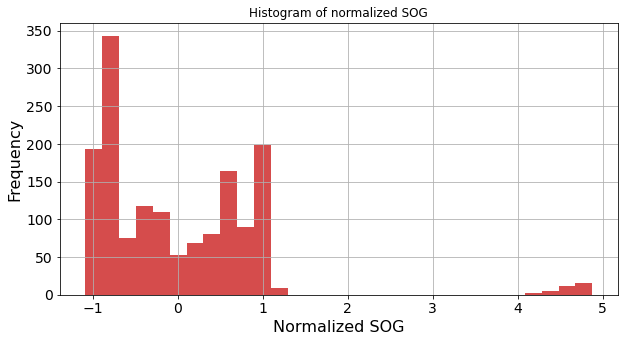

In [37]:
import matplotlib.pyplot as plt

# Normalize SOG
study_data['SOG_norm'] = (study_data['SOG'] - study_data['SOG'].mean(axis = 0)) / study_data['SOG'].std(axis = 0)

# Make histogram of normalized SOG
study_data['SOG_norm'].plot(kind = 'hist', alpha = 0.7, bins = 30, title = 'Histogram of normalized SOG', 
                            grid = True, figsize = (10,5), fontsize = 14, color = ['#C40000'])
plt.xlabel('Normalized SOG', fontsize = 16)
plt.ylabel("Frequency", fontsize = 16)
plt.show()

# Remove SOG outliers
study_data = study_data[(study_data['SOG_norm'] < 4)].dropna()

# Standardize to 0 to 1
study_data['SOG_norm'] = ((study_data['SOG_norm'] - study_data['SOG_norm'].min(axis=0)) / 
                           (study_data['SOG_norm'].max(axis=0) - study_data['SOG_norm'].min(axis=0)))

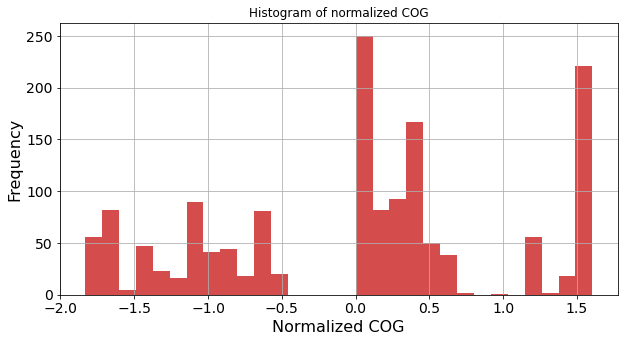

In [38]:
# Normalize COG
study_data['COG_norm'] = (study_data['COG'] - study_data['COG'].mean(axis = 0)) / study_data['COG'].std(axis = 0)

# Make histogram of normalized COG
study_data['COG_norm'].plot(kind = 'hist', alpha = 0.7, bins = 30, title = 'Histogram of normalized COG', 
                            grid = True, figsize = (10,5), fontsize = 14, color = ['#C40000'])
plt.xlabel('Normalized COG', fontsize = 16)
plt.ylabel("Frequency", fontsize = 16)
plt.show()

# Standardize to 0 to 1
study_data['COG_norm'] = ((study_data['COG_norm'] - study_data['COG_norm'].min(axis=0)) / 
                           (study_data['COG_norm'].max(axis=0) - study_data['COG_norm'].min(axis=0)))

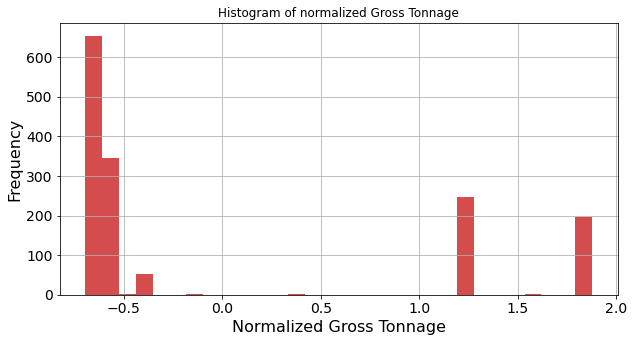

In [39]:
# Normalize Gross Tonnage
study_data['GrossTonnage_norm'] = (study_data['GrossTonnage'] - study_data['GrossTonnage'].mean(axis = 0)) / study_data['GrossTonnage'].std(axis = 0)

# Make histogram of normalized Gross Tonnage
study_data['GrossTonnage_norm'].plot(kind = 'hist', alpha = 0.7, bins = 30, title = 'Histogram of normalized Gross Tonnage', 
                            grid = True, figsize = (10,5), fontsize = 14, color = ['#C40000'])
plt.xlabel('Normalized Gross Tonnage', fontsize = 16)
plt.ylabel("Frequency", fontsize = 16)
plt.show()

# Standardize to 0 to 1
study_data['GrossTonnage_norm'] = ((study_data['GrossTonnage_norm'] - study_data['GrossTonnage_norm'].min(axis=0)) / 
                                    (study_data['GrossTonnage_norm'].max(axis=0) - study_data['GrossTonnage_norm'].min(axis=0)))

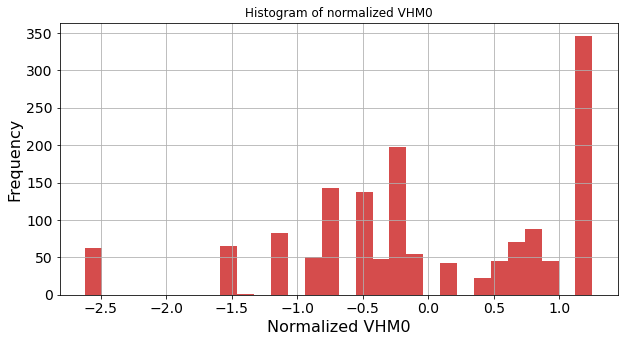

In [40]:
# Normalize VHM0
study_data['VHM0_norm'] = (study_data['VHM0'] - study_data['VHM0'].mean(axis = 0)) / study_data['VHM0'].std(axis = 0)

# Make histogram of normalized VHM0
study_data['VHM0_norm'].plot(kind = 'hist', alpha = 0.7, bins = 30, title = 'Histogram of normalized VHM0', 
                            grid = True, figsize = (10,5), fontsize = 14, color = ['#C40000'])
plt.xlabel('Normalized VHM0', fontsize = 16)
plt.ylabel("Frequency", fontsize = 16)
plt.show()

# Remove VHM0 outliers
study_data = study_data[(study_data['VHM0_norm'] > -2)].dropna()

# Standardize to 0 to 1
study_data['VHM0_norm'] = ((study_data['VHM0_norm'] - study_data['VHM0_norm'].min(axis=0)) / 
                            (study_data['VHM0_norm'].max(axis=0) - study_data['VHM0_norm'].min(axis=0)))

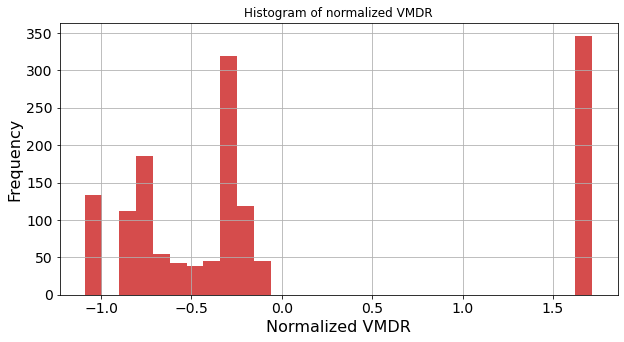

In [41]:
# Normalize VMDR
study_data['VMDR_norm'] = (study_data['VMDR'] - study_data['VMDR'].mean(axis = 0)) / study_data['VMDR'].std(axis = 0)

# Make histogram of normalized VMDR
study_data['VMDR_norm'].plot(kind = 'hist', alpha = 0.7, bins = 30, title = 'Histogram of normalized VMDR', 
                            grid = True, figsize = (10,5), fontsize = 14, color = ['#C40000'])
plt.xlabel('Normalized VMDR', fontsize = 16)
plt.ylabel("Frequency", fontsize = 16)
plt.show()

# Standardize to 0 to 1
study_data['VMDR_norm'] = ((study_data['VMDR_norm'] - study_data['VMDR_norm'].min(axis=0)) / 
                            (study_data['VMDR_norm'].max(axis=0) - study_data['VMDR_norm'].min(axis=0)))

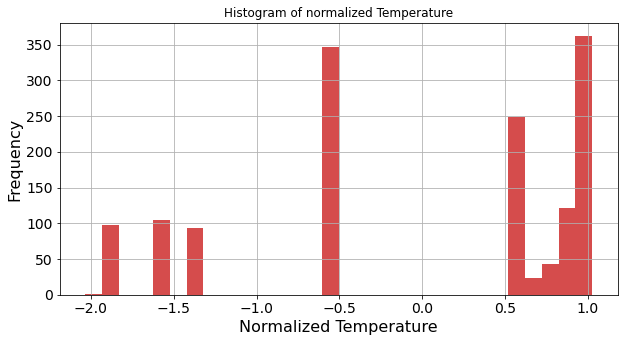

In [42]:
# Normalize Temperature
study_data['Temperature_norm'] = (study_data['Temperature'] - study_data['Temperature'].mean(axis = 0)) / study_data['Temperature'].std(axis = 0)

# Make histogram of normalized Temperature
study_data['Temperature_norm'].plot(kind = 'hist', alpha = 0.7, bins = 30, title = 'Histogram of normalized Temperature', 
                            grid = True, figsize = (10,5), fontsize = 14, color = ['#C40000'])
plt.xlabel('Normalized Temperature', fontsize = 16)
plt.ylabel("Frequency", fontsize = 16)
plt.show()

# Standardize to 0 to 1
study_data['Temperature_norm'] = ((study_data['Temperature_norm'] - study_data['Temperature_norm'].min(axis=0)) / 
                                   (study_data['Temperature_norm'].max(axis=0) - study_data['Temperature_norm'].min(axis=0)))

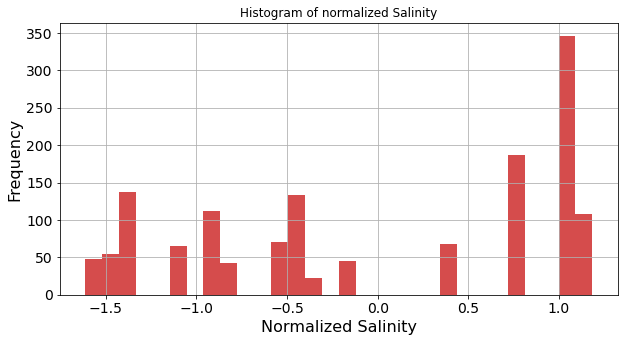

In [43]:
# Normalize Salinity
study_data['Salinity_norm'] = (study_data['Salinity'] - study_data['Salinity'].mean(axis = 0)) / study_data['Salinity'].std(axis = 0)

# Make histogram of normalized Salinity
study_data['Salinity_norm'].plot(kind = 'hist', alpha = 0.7, bins = 30, title = 'Histogram of normalized Salinity', 
                            grid = True, figsize = (10,5), fontsize = 14, color = ['#C40000'])
plt.xlabel('Normalized Salinity', fontsize = 16)
plt.ylabel("Frequency", fontsize = 16)
plt.show()

# Standardize to 0 to 1
study_data['Salinity_norm'] = ((study_data['Salinity_norm'] - study_data['Salinity_norm'].min(axis=0)) / 
                               (study_data['Salinity_norm'].max(axis=0) - study_data['Salinity_norm'].min(axis=0)))

In [44]:
print("After preprocessing...")
final_data = study_data.filter(['EstimatedTime', 'LAT', 'LON', 'Heading', 'SOG_norm', 'COG_norm', 'GrossTonnage_norm', 'VHM0_norm', 'VMDR_norm', 'Temperature_norm', 'Salinity_norm'])
final_data = final_data.dropna()
final_data

After preprocessing...


,EstimatedTime,LAT,LON,Heading,SOG_norm,COG_norm,GrossTonnage_norm,VHM0_norm,VMDR_norm,Temperature_norm,Salinity_norm
0,2020-01-01 02:00:00,58.30366,-135.76334,286.0,0.269841,0.214152,0.013279,0.453333,0.271997,0.214729,1.00000
1,2020-01-01 02:00:00,58.30416,-135.77211,272.0,0.301587,0.168856,0.013279,0.453333,0.271997,0.214729,1.00000
2,2020-01-01 02:00:00,58.30230,-135.75792,298.0,0.095238,0.236130,0.013279,0.453333,0.271997,0.214729,1.00000
3,2020-01-01 02:00:00,58.30056,-135.81402,245.0,0.587302,0.097025,0.013279,0.453333,0.271997,0.214729,1.00000
4,2020-01-01 02:00:00,58.29911,-135.82011,246.0,0.634921,0.105066,0.013279,0.453333,0.271997,0.214729,1.00000
...,...,...,...,...,...,...,...,...,...,...,...
1531,2020-07-01 22:00:00,58.93174,-146.96082,7.0,0.761905,0.559367,0.748764,0.000000,0.000000,1.000000,0.19350
1532,2020-07-01 23:00:00,67.53345,-164.43977,158.0,0.000000,0.965425,0.035174,1.000000,1.000000,0.496728,0.96325
1533,2020-07-02 00:00:00,67.50325,-164.40912,158.0,0.047619,0.966497,0.035174,1.000000,1.000000,0.496728,0.96325
1534,2020-07-02 00:00:00,67.49007,-164.39572,162.0,0.031746,0.972125,0.035174,1.000000,1.000000,0.496728,0.96325


## Notes from meetings

**02 - 06 - 2021**

Space time cubes
- 52N: sfTracks space time cube

Simple solution:
- Start simple
- Least cost path as in simple_routing.ipynb

**09 - 06 - 2021**

Easy retrieval for cmems data: harvester.maridata EnvDataAPI github

Regarding modelling:
- Filter by ship types
- 2000 records are too low
- Have specific lengths and widths of ships
- Exclude SOG below 7 knots
- Standardization & normalization are recommended

Regarding routing:
- Genetic algorithm (Group C)
- Multi-objective optimization: pymoo - NSGA-II